In [465]:
# Importing the Dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [466]:
#load the dataset
df = pd.read_csv('Advertising.csv')

In [467]:
#printing the first 5 rows of the dataframe
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [468]:
# checking the number of rows and columns in the dataframe
df.shape

(200, 5)

In [469]:
# printing the column features
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [470]:
# Checking the general information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [471]:
#perfroming statistical analysis
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [472]:
# checking if there is any null value or not in the dataset.
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

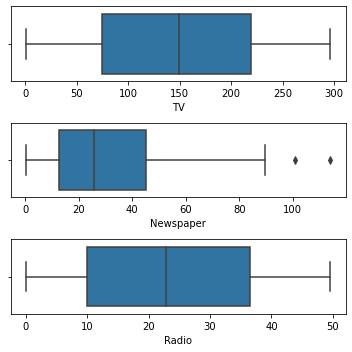

In [473]:
# checking for outliers
fig , axs = plt.subplots(3 , figsize =(5,5))
plt1 = sns.boxplot(df['TV'],ax = axs[0])
plt1 = sns.boxplot(df['Newspaper'],ax = axs[1])
plt1 = sns.boxplot(df['Radio'],ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

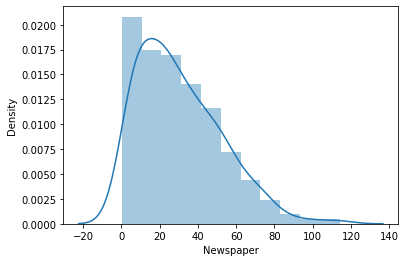

In [474]:
sns.distplot(df['Newspaper'])

In [475]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [476]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [477]:
data = df.copy()

In [478]:
data.loc[data['Newspaper']>=93 , 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

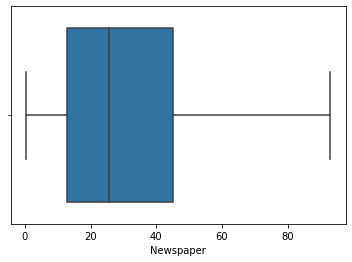

In [479]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

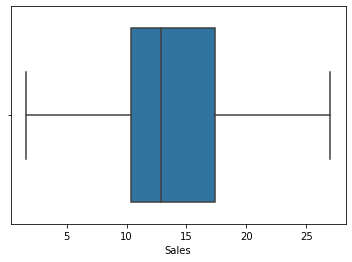

In [480]:
sns.boxplot(data['Sales'])

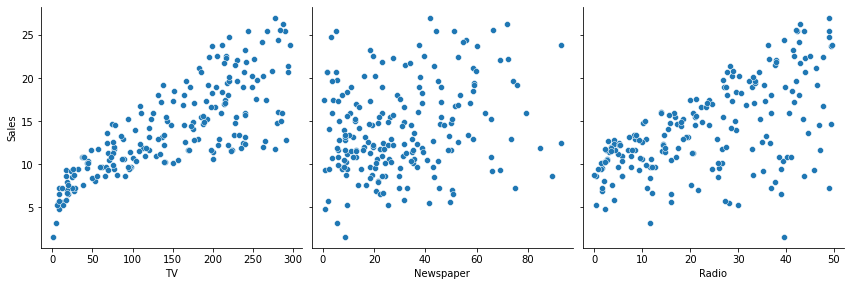

In [481]:
sns.pairplot(data , x_vars = ['TV','Newspaper','Radio'],
            y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

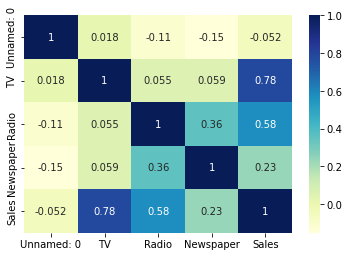

In [482]:
sns.heatmap(data.corr(), cmap='YlGnBu' , annot=True)
plt.show()

In [483]:
#selecting the important features having correlation of 0.5 & 1.5 and 0.5 & -1.5
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [484]:
print(important_features)

['TV', 'Radio', 'Sales']


In [485]:
#declaring dependent and independent variable of features
X = data ['TV']
y = data [ 'Sales']

In [486]:
X = X.values.reshape(-1,1)

In [487]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [488]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [489]:
print(X.shape,y.shape)

(200, 1) (200,)


In [490]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.33)

In [491]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [492]:
#Importing the model Algorithms
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [493]:
# K Nighbors Regressor
knn =  KNeighborsRegressor().fit(X_train,y_train)
knn

KNeighborsRegressor()

In [494]:
knn_train_pred =knn.predict(X_train)

In [495]:
knn_test_pred =knn.predict(X_test)

In [496]:
print(knn_train_pred ,knn_test_pred )

[13.24 16.98 13.24 11.94 15.98 13.8  11.44 13.8   9.76 17.46 14.44 16.26
 13.7  14.68 11.08 12.84 14.46 12.7  11.32 12.7  14.44 13.52 20.2  15.6
 17.6  14.46 11.14 15.52 13.8  15.22 13.22 11.52 14.84 13.22 18.24 13.8
 14.16 15.02 12.42 17.46 12.84 16.86 17.02 11.3  14.36 14.56 12.86 13.58
 11.48 12.16 11.94 12.7  16.98 19.42 15.78 12.86 12.14  9.76 12.44 19.26
 11.52 14.62 11.64 14.68 12.14 11.3  17.56  9.6  15.02 14.16 13.52 13.52
 13.22 16.2  19.68 11.32 14.18 19.26 17.92 11.64 15.88 17.02 13.8  16.26
 12.   12.14 13.3   9.86 10.08 14.68 12.44 14.46 12.16 18.24  7.3  11.48
 14.18 11.04 12.   14.84 16.2  15.5   7.3  12.84 17.02 19.26 12.32 16.86
 13.   12.14 15.98 11.52 16.76 14.68 14.68 13.58 12.7  15.98 14.36 14.44
  9.86 12.16 14.36 12.84 14.44 11.08 13.8  13.52 13.22 13.88 15.52 15.02
 12.84 17.02] [11.64 14.16 15.86 17.02 14.9  14.46 12.32 19.42  9.76 13.24 13.58 15.4
 14.86 11.48 11.08 16.54 15.22 13.52 13.04 20.2  13.54 16.98 12.16 14.46
 12.   14.58 14.16 16.6  11.3  11.32 12.

In [497]:
Results = pd.DataFrame(columns=['Model','Train R2' ,'Test R2','Test RMSE','Variance'])

In [498]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'K_Nearest Neighbors','Train R2':r2_train ,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: -0.2003239307822171
RMSE: 5.871314446811151


In [499]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K_Nearest Neighbors,0.140398,-0.200324,5.871314,0.340722


In [500]:
# Support Vector Regressor
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [501]:
svr_train_pred=svr.predict(X_train)
svr_test_pred=svr.predict(X_test)

In [502]:
print(svr_train_pred,svr_test_pred)

[13.14071458 12.49865724 13.13890052 13.08400201 12.03843384 12.49053879
 13.55519269 12.49000932 12.44221483 12.48433089 13.32049666 12.47571646
 12.41851313 12.68766098 12.40052546 11.9930554  12.49309762 13.50805023
 12.20545795 13.49659612 13.28013761 12.49106144 13.14028467 12.49674382
 12.98479525 13.52100341 12.40039065 12.63573568 12.71169276 13.10147326
 12.46995436 12.40012772 13.53771957 12.46716308 13.56346554 12.49171355
 12.46487074 12.79967572 13.57941928 12.48702573 12.0070649  13.05759586
 12.90384443 12.39192321 13.35027441 12.6778719  13.00077686 13.28463765
 12.26345084 13.46239    13.11521415 13.51785917 12.49811305 13.2356077
 13.55140602 12.98968247 12.45468184 12.4260168  12.48200094 13.15434548
 12.40014394 12.46093822 12.44684408 12.67026823 13.47740951 13.37979628
 13.02357519 13.57704682 12.84468978 12.49854869 12.47857242 12.52095079
 12.46964934 12.4714173  13.19954285 12.1998791  12.63338348 13.17222034
 13.57756122 12.49618292 13.50062935 12.93682178 12.

In [503]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'Supoort Vector Machine','Train R2':r2_train ,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: -0.09797623142519907
RMSE: 5.615424303916079


In [504]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K_Nearest Neighbors,0.140398,-0.200324,5.871314,0.340722
1,Supoort Vector Machine,-0.052471,-0.097976,5.615424,0.045506


In [505]:
# Importing statistical model
import statsmodels.api as sm

In [506]:
X_train_constant = sm.add_constant(X_train)

In [507]:
model = sm.OLS(y_train, X_train_constant).fit()

In [508]:
model.params

const    13.514452
x1        0.003636
dtype: float64

In [509]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4378
Date:                Thu, 15 Jun 2023   Prob (F-statistic):              0.509
Time:                        15:49:46   Log-Likelihood:                -415.53
No. Observations:                 134   AIC:                             835.1
Df Residuals:                     132   BIC:                             840.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5145      0.950     14.232      0.0

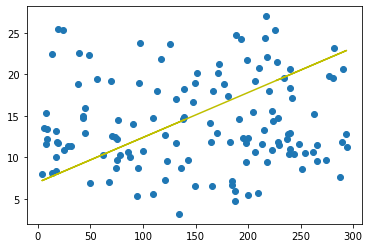

In [510]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9955 + 0.0541 * X_train , 'y')
plt.show()

In [511]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

162    0.879044
148   -2.705718
70     4.279408
75    -5.309684
47     8.662360
         ...   
111    7.859401
143   -3.998743
91    -6.654416
165   -2.667820
39     7.159434
Name: Sales, Length: 134, dtype: float64

In [512]:
y_train_pred

array([14.02095585, 13.60571762, 14.02059225, 14.00968406, 14.5376402 ,
       13.57699274, 14.19948648, 13.57590192, 13.84315244, 13.65807691,
       14.0591345 , 13.67116673, 13.74097911, 14.38456201, 13.79224758,
       14.58200015, 13.58281044, 14.1125846 , 14.478736  , 14.10822133,
       14.05004435, 13.86787766, 14.30856832, 13.62898842, 14.33547518,
       14.21693957, 13.7813394 , 14.39328856, 14.38056234, 14.31547684,
       13.54608622, 13.78606628, 14.20930384, 13.54281376, 14.1416731 ,
       13.57953798, 13.85587866, 13.9525979 , 14.17185241, 13.65335003,
       14.56018378, 14.32311257, 14.3489286 , 14.4372849 , 14.26675361,
       13.92496383, 13.99332179, 14.28093425, 14.46455536, 14.23766512,
       14.01586537, 14.11658427, 13.60099074, 14.29075162, 14.13331016,
       13.99114015, 13.52936033, 13.83151705, 13.56208489, 14.30602308,
       13.7875207 , 13.69007425, 14.42674032, 14.38747086, 14.23293824,
       14.2598451 , 14.32893027, 14.17839732, 13.96205166, 13.61

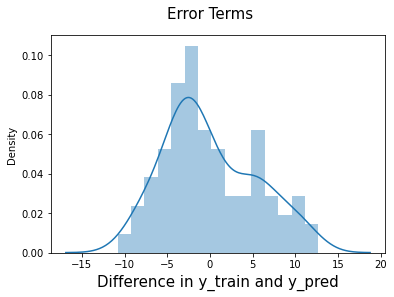

In [513]:
fig = plt.figure()
sns.distplot(res , bins = 15)
fig.suptitle('Error Terms ' , fontsize =15)
plt.xlabel ('Difference in y_train and y_pred' , fontsize = 15)
plt.show()

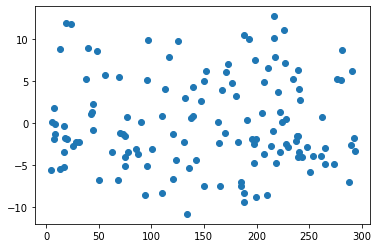

In [514]:
plt.scatter(X_train,res)
plt.show()

In [515]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [516]:
y_pred

array([14.41910459, 13.85696948, 14.35838236, 14.35111024, 13.93623562,
       14.2187576 , 13.76315909, 14.29038801, 13.83551671, 14.02168307,
       14.28057065, 13.887876  , 14.25075494, 14.47037306, 13.79224758,
       13.64862315, 14.31620405, 13.86896848, 13.98495884, 14.30893193,
       13.5569944 , 13.60535402, 14.23839233, 13.58499207, 13.76534073,
       13.89478452, 13.61444417, 14.55436608, 14.4431026 , 14.48491731,
       14.006048  , 13.80606462, 14.29511489, 13.75479615, 13.79188398,
       14.59218112, 13.58244683, 14.10894854, 13.95150708, 14.52127792,
       14.54563953, 14.15112686, 13.65262282, 14.31365881, 14.54818478,
       13.70898177, 13.90496549, 14.37765349, 13.91696449, 14.15330849,
       13.78897513, 14.53327693, 13.61189893, 14.12676524, 13.5449954 ,
       13.60753566, 13.72352602, 14.08385972, 13.73116175, 13.8406072 ,
       14.15803537, 13.757705  , 14.25657264, 13.51699772, 14.02459191,
       14.02822798])

In [517]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [518]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.364202066037219

In [519]:
r2=r2_score(y_test,y_pred)
r2

-0.001931526703192965

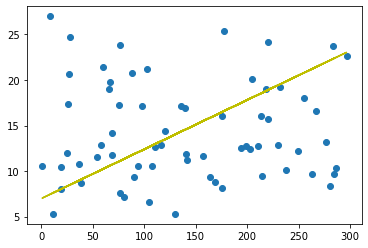

In [520]:
plt.scatter(X_test, y_test)
plt.plot(X_test,6.9955 + 0.0541 * X_test , 'y')
plt.show()